# Business Understanding

This project is to provide an answer for the transaction analysis of a retail store in a country.Dataset used is present on "https://www.kaggle.com/azzabiala/corporacin-favorita-grocery-sales-forecasting%22"

Here are the business questions that need to be answered:

1)What is the total number of transactions has been done in each state?

2)Which state got the highest and minimum transaction along with their values?

3)Which city has National Holidays in 2017 ?

4)What are the average oil price in every year and in which year oil prices were increased too much on an average?

5)Which family has the lowest item numbers?

6)Describe the transactions on weekly basis?

# Data understanding

Import important libraries that are required and the dataset- items,oil,holidays etc.

In [136]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
#Load the items dataset
items=pd.read_csv(r"C:\Users\shivanpa\dataset\items.csv")
items.head(5)

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [138]:
#load the oil dataset
oil=pd.read_csv(r"C:\Users\shivanpa\dataset\oil.csv")
oil.head(5)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [139]:
#load the stores dataset
stores=pd.read_csv(r"C:\Users\shivanpa\dataset\stores.csv")
stores.head(5)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [140]:
#load the holiday dataset
holidays_events=pd.read_csv(r"C:\Users\shivanpa\dataset\holidays_events.csv")
holidays_events.head(5)

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [141]:
#load the transaction dataset
trans=pd.read_csv(r"C:\Users\shivanpa\dataset\transactions.csv")
trans.head(5)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


# Data preparation

Now we will analyse each dataset if they contain null value or not and will clean them by removing it.

1) analysing the item dataset

In [142]:
#analyse the dataset
items['class']

0       1093
1       1067
2       3008
3       1028
4       2712
5       1045
6       1045
7       1045
8       1045
9       1034
10      1044
11      1092
12      1032
13      1030
14      1075
15      2636
16      2644
17      2644
18      3044
19      1004
20      2416
21      2502
22      1062
23      3024
24      1034
25      1072
26      1044
27      1016
28      1004
29      4126
        ... 
4070    1028
4071    1122
4072    1148
4073    1086
4074    1086
4075    1068
4076    1042
4077    1124
4078    1030
4079    1016
4080    1094
4081    1092
4082    1092
4083    1092
4084    1094
4085    1094
4086    1094
4087    1064
4088    1040
4089    1030
4090    1318
4091    1328
4092    1002
4093    1002
4094    1040
4095    1002
4096    1026
4097    1068
4098    1124
4099    1364
Name: class, Length: 4100, dtype: int64

let's check if they have any null values

In [143]:
items.isnull().sum()

item_nbr      0
family        0
class         0
perishable    0
dtype: int64

Great! it doesn't have any null value. Now move to next dataset i.e. Oil

In [144]:
#analyse the oil dataset
len(oil)

1218

Let's check for some null values

In [145]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

Now we will remove the null values

In [146]:
#fill the NaN values with mean values
mean_oil_price=(np.mean(oil.dcoilwtico))
oil.fillna(mean_oil_price,inplace=True)
oil

,date,dcoilwtico
0,2013-01-01,67.714366
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-07,93.200000
5,2013-01-08,93.210000
6,2013-01-09,93.080000
7,2013-01-10,93.810000
8,2013-01-11,93.600000
9,2013-01-14,94.270000


We have decided to replace the Nan value instead of droping or imputing:

1) It will be able to process any future data that contains missing values which won't be possible if we have dropped it.

2) Imputing would make the code more complex and our needs are met easily by replacing the nan values

Now we will analyze other datasets.

In [147]:
#analyse the stores dataset
stores['type']

0     D
1     D
2     D
3     D
4     D
5     D
6     D
7     D
8     B
9     C
10    B
11    C
12    C
13    C
14    C
15    C
16    C
17    B
18    C
19    B
20    B
21    C
22    D
23    D
24    D
25    D
26    D
27    E
28    E
29    C
30    B
31    C
32    C
33    B
34    C
35    E
36    D
37    D
38    B
39    C
40    D
41    D
42    E
43    A
44    A
45    A
46    A
47    A
48    A
49    A
50    A
51    A
52    D
53    C
Name: type, dtype: object

In [148]:
stores.isnull().sum()

store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

In [149]:
stores['state']

0                          Pichincha
1                          Pichincha
2                          Pichincha
3                          Pichincha
4     Santo Domingo de los Tsachilas
5                          Pichincha
6                          Pichincha
7                          Pichincha
8                          Pichincha
9                          Pichincha
10                         Pichincha
11                          Cotopaxi
12                          Cotopaxi
13                        Chimborazo
14                          Imbabura
15    Santo Domingo de los Tsachilas
16                         Pichincha
17                         Pichincha
18                           Bolivar
19                         Pichincha
20    Santo Domingo de los Tsachilas
21                           Pastaza
22                        Tungurahua
23                            Guayas
24                       Santa Elena
25                            Guayas
26                            Guayas
2

Comment: Stores dataset is fine

In [150]:
#analyse the holiday dataset
holidays_events.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [151]:
holidays_events.isnull().sum()

date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Comment: Great Holiday dataset is also clean

In [152]:
#analyse the transaction dataset
len(trans)

83488

In [153]:
trans['store_nbr']

0        25
1         1
2         2
3         3
4         4
5         5
6         6
7         7
8         8
9         9
10       10
11       11
12       12
13       13
14       14
15       15
16       16
17       17
18       18
19       19
20       23
21       24
22       25
23       26
24       27
25       28
26       30
27       31
28       32
29       33
         ..
83458    25
83459    26
83460    27
83461    28
83462    29
83463    30
83464    31
83465    32
83466    33
83467    34
83468    35
83469    36
83470    37
83471    38
83472    39
83473    40
83474    41
83475    42
83476    43
83477    44
83478    45
83479    46
83480    47
83481    48
83482    49
83483    50
83484    51
83485    52
83486    53
83487    54
Name: store_nbr, Length: 83488, dtype: int64

In [154]:
trans.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

Great! transaction dataset is also clean.Now our dataset ready for use.

# Data Analysis

Now we will perform actions on the datasets to get answers of our business questions.

In [155]:
#merge the dataset with transactions
stores=stores.merge(trans,on='store_nbr',how='left')
del trans

We merged it as we need to know which store has what transaction

In [156]:
stores

,store_nbr,city,state,type,cluster,date,transactions
0,1,Quito,Pichincha,D,13,2013-01-02,2111
1,1,Quito,Pichincha,D,13,2013-01-03,1833
2,1,Quito,Pichincha,D,13,2013-01-04,1863
3,1,Quito,Pichincha,D,13,2013-01-05,1509
4,1,Quito,Pichincha,D,13,2013-01-06,520
5,1,Quito,Pichincha,D,13,2013-01-07,1807
6,1,Quito,Pichincha,D,13,2013-01-08,1869
7,1,Quito,Pichincha,D,13,2013-01-09,1910
8,1,Quito,Pichincha,D,13,2013-01-10,1679
9,1,Quito,Pichincha,D,13,2013-01-11,1813


We will create function for graphical representation for our data

In [158]:
def plot(x):
    """this function will represent the data in bar graph format.
          'x'--data to be reprsent in the graphical format.
          """
    x.plot.bar(figsize=(16,8))
    return
    

**Q1) What is the total number of transactions has been done in each state?**


Now as per our first question we need to get total number of statewise transaction. This can be done by grouping them by state and sum up.

In [159]:
#Total number of transactions state wise

tot_trans_state_wise=stores.groupby(['state'])[['transactions']].sum()
tot_trans_state_wise

,transactions
state,
Azuay,5673847
Bolivar,2107489
Chimborazo,2287850
Cotopaxi,3531356
El Oro,3945341
Esmeraldas,2182356
Guayas,21894000
Imbabura,2209898
Loja,2867052


Graphical representation would be more clear.So we will call our plot function.

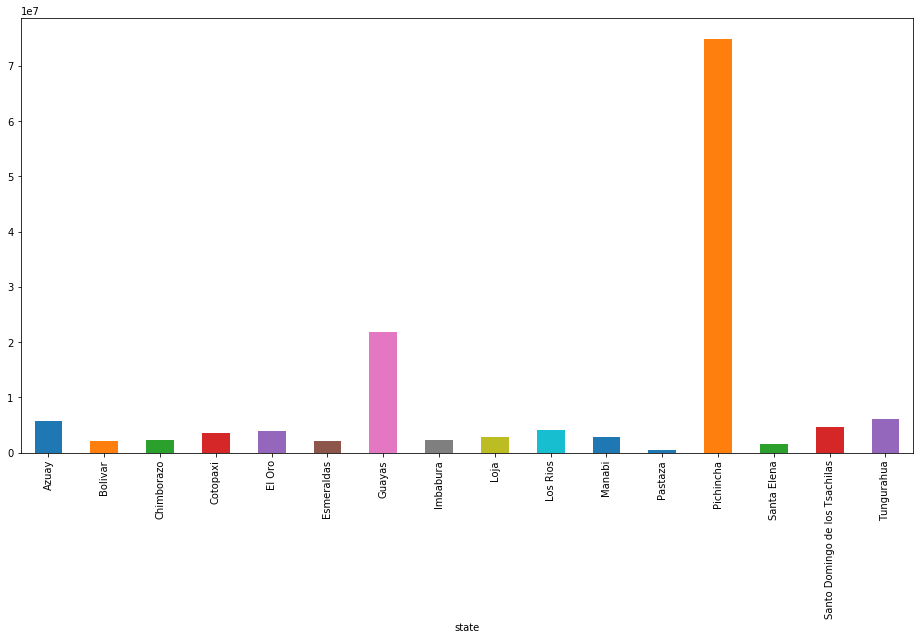

In [160]:
#plot the bar graph
y=tot_trans_state_wise['transactions']
plot(y)

**Q2)Which state got the highest and minimum transaction along with their values?**

It's clear from the above graph which state has the highest and minimum tranctions but for the value we need to find out and for it we have below code.

state got the heightest transaction: transactions    74971545
Name: Pichincha, dtype: int64


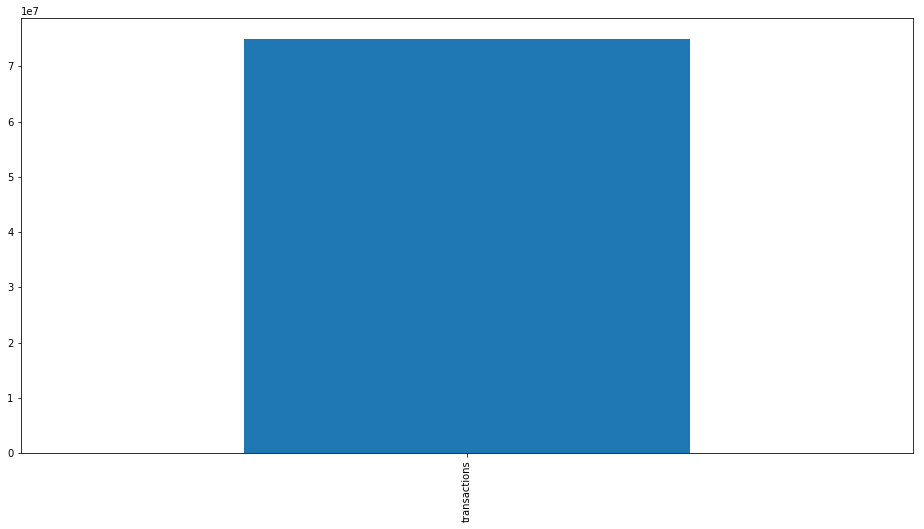

In [161]:
#To find state who got the highest transaction and the value of the transaction

z=tot_trans_state_wise.loc[tot_trans_state_wise['transactions'].idxmax()]
print('state got the heightest transaction:',z)

# for Graphical representation
plot(z)


state got the minimum transaction: transactions    504156
Name: Pastaza, dtype: int64


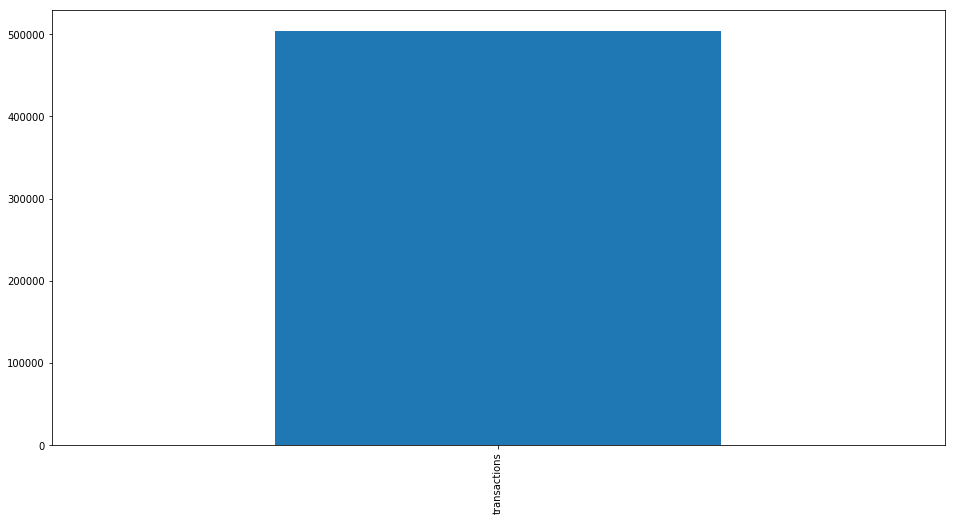

In [162]:
#To find state who got the highest transaction and the value of the transaction

z=tot_trans_state_wise.loc[tot_trans_state_wise['transactions'].idxmin()]
print('state got the minimum transaction:',z)

# for Graphical representation

plot(z)

**Q4) Which cities have National Holidays in 2017?**

for this we first need to merge the stores and holidays dataset

In [163]:
#merge the store values with haliday_events
stores=stores.merge(holidays_events,on='date',how='left')




how is our new stores dataset after merging

In [164]:
stores

,store_nbr,city,state,type_x,cluster,date,transactions,type_y,locale,locale_name,description,transferred
0,1,Quito,Pichincha,D,13,2013-01-02,2111,NaN,NaN,NaN,NaN,NaN
1,1,Quito,Pichincha,D,13,2013-01-03,1833,NaN,NaN,NaN,NaN,NaN
2,1,Quito,Pichincha,D,13,2013-01-04,1863,NaN,NaN,NaN,NaN,NaN
3,1,Quito,Pichincha,D,13,2013-01-05,1509,Work Day,National,Ecuador,Recupero puente Navidad,False
4,1,Quito,Pichincha,D,13,2013-01-06,520,NaN,NaN,NaN,NaN,NaN
5,1,Quito,Pichincha,D,13,2013-01-07,1807,NaN,NaN,NaN,NaN,NaN
6,1,Quito,Pichincha,D,13,2013-01-08,1869,NaN,NaN,NaN,NaN,NaN
7,1,Quito,Pichincha,D,13,2013-01-09,1910,NaN,NaN,NaN,NaN,NaN
8,1,Quito,Pichincha,D,13,2013-01-10,1679,NaN,NaN,NaN,NaN,NaN
9,1,Quito,Pichincha,D,13,2013-01-11,1813,NaN,NaN,NaN,NaN,NaN


We can see many NaN values. We need to drop all NaN values rows as we require only those rows which have holiday dates in it

In [165]:
#remove the missing values
stores=stores.dropna()
stores

,store_nbr,city,state,type_x,cluster,date,transactions,type_y,locale,locale_name,description,transferred
3,1,Quito,Pichincha,D,13,2013-01-05,1509,Work Day,National,Ecuador,Recupero puente Navidad,False
10,1,Quito,Pichincha,D,13,2013-01-12,1473,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
40,1,Quito,Pichincha,D,13,2013-02-11,396,Holiday,National,Ecuador,Carnaval,False
41,1,Quito,Pichincha,D,13,2013-02-12,487,Holiday,National,Ecuador,Carnaval,False
59,1,Quito,Pichincha,D,13,2013-03-02,1332,Holiday,Local,Manta,Fundacion de Manta,False
89,1,Quito,Pichincha,D,13,2013-04-01,1894,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
100,1,Quito,Pichincha,D,13,2013-04-12,1860,Holiday,Local,Cuenca,Fundacion de Cuenca,False
102,1,Quito,Pichincha,D,13,2013-04-14,525,Holiday,Local,Libertad,Cantonizacion de Libertad,False
109,1,Quito,Pichincha,D,13,2013-04-21,505,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
117,1,Quito,Pichincha,D,13,2013-04-29,1653,Holiday,National,Ecuador,Viernes Santo,False


Now we just need to find out those rows which fall under 2017 year and has national holiday and its respective city to answer our Question and below is the code for the it.

In [166]:
#stores_1=stores[['type_y','locale','date']]
stores['date']=pd.to_datetime(stores['date'])
stores['year']=stores['date'].dt.year
stores_1=stores[['type_y','locale','year','city']]
stores_1[stores_1['type_y']=='Holiday'][stores_1['locale']=='National'][stores_1['year']==2017]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,type_y,locale,year,city
1532,Holiday,National,2017,Quito
1533,Holiday,National,2017,Quito
1579,Holiday,National,2017,Quito
1596,Holiday,National,2017,Quito
1619,Holiday,National,2017,Quito
1700,Holiday,National,2017,Quito
3239,Holiday,National,2017,Quito
3240,Holiday,National,2017,Quito
3286,Holiday,National,2017,Quito
3303,Holiday,National,2017,Quito


**Q-4) What are the average oil price in every year and in which year oil prices were increased too much on an average?**

Now for this Question

first We need to merge the store and oil dataset. then we need to clean it and then apply function to get our answer as shown below.

In [167]:
#merge the dataset with oil dataset
oil['date']=pd.to_datetime(oil['date'])
stores=stores.merge(oil,on='date',how='left')
del oil

In [168]:
#replace the NaN values with mean values of oil price
mean_oil_price=(np.mean(stores.dcoilwtico))
stores.fillna(mean_oil_price,inplace=True)
stores

,store_nbr,city,state,type_x,cluster,date,transactions,type_y,locale,locale_name,description,transferred,year,dcoilwtico
0,1,Quito,Pichincha,D,13,2013-01-05,1509,Work Day,National,Ecuador,Recupero puente Navidad,False,2013,64.326826
1,1,Quito,Pichincha,D,13,2013-01-12,1473,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,2013,64.326826
2,1,Quito,Pichincha,D,13,2013-02-11,396,Holiday,National,Ecuador,Carnaval,False,2013,97.010000
3,1,Quito,Pichincha,D,13,2013-02-12,487,Holiday,National,Ecuador,Carnaval,False,2013,97.480000
4,1,Quito,Pichincha,D,13,2013-03-02,1332,Holiday,Local,Manta,Fundacion de Manta,False,2013,64.326826
5,1,Quito,Pichincha,D,13,2013-04-01,1894,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,2013,97.100000
6,1,Quito,Pichincha,D,13,2013-04-12,1860,Holiday,Local,Cuenca,Fundacion de Cuenca,False,2013,91.230000
7,1,Quito,Pichincha,D,13,2013-04-14,525,Holiday,Local,Libertad,Cantonizacion de Libertad,False,2013,64.326826
8,1,Quito,Pichincha,D,13,2013-04-21,505,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False,2013,64.326826
9,1,Quito,Pichincha,D,13,2013-04-29,1653,Holiday,National,Ecuador,Viernes Santo,False,2013,94.090000


in the above we replace the null values because we need each row for our analysis.

In [169]:
#to calculate average oil in each year
mean_oil_price=stores.groupby(['year'])[['dcoilwtico']].mean()
mean_oil_price

,dcoilwtico
year,
2013,85.270383
2014,81.031597
2015,52.243890
2016,51.507240
2017,56.845240


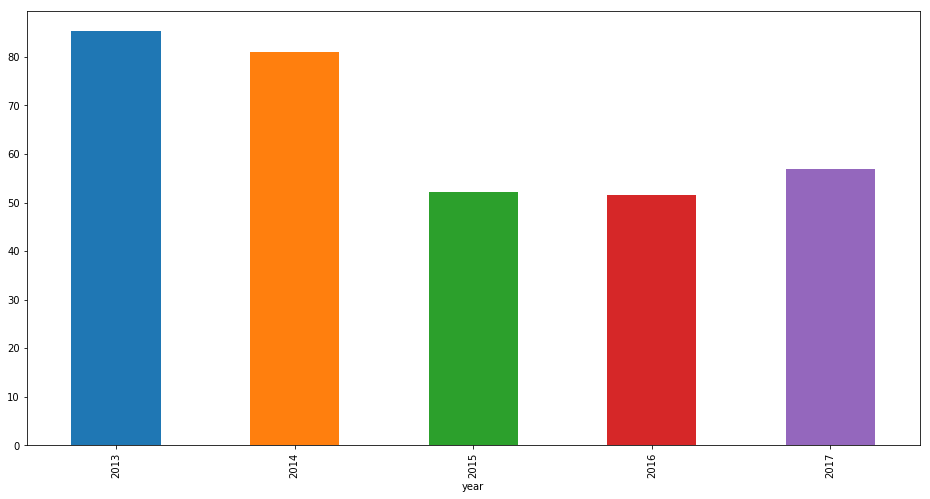

In [170]:
#Graphical representation

z=mean_oil_price['dcoilwtico']
plot(z)

From the graph we can clearly see that 2013 has the highest average of oil price.

**Q5)which item family has the lowest item numbers?**

For this question's answer we just need to gruop it by family and item number and gets its count.

In [171]:
# to get count of families and item number
low_item_total=items.groupby(['family'])[['item_nbr']].count()
low_item_total

,item_nbr
family,
AUTOMOTIVE,20
BABY CARE,1
BEAUTY,19
BEVERAGES,613
BOOKS,1
BREAD/BAKERY,134
CELEBRATION,31
CLEANING,446
DAIRY,242


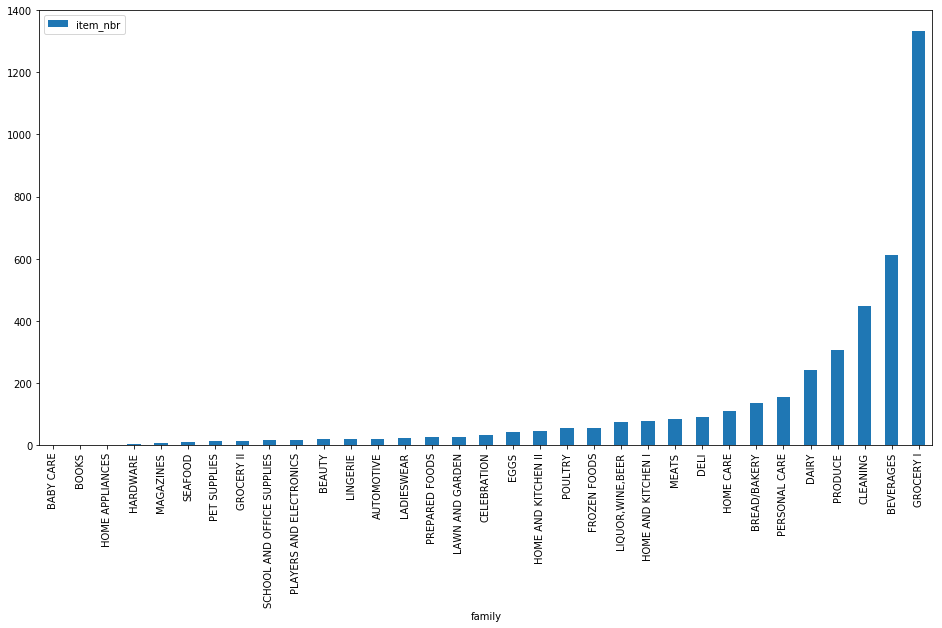

In [172]:
#plot the bar chart
z=low_item_total.sort_values('item_nbr',ascending=True)
plot(z)

**Q6)Describe the transactions on weekly basis?**

For this we need to group it by week and get the total transaction

In [173]:
#need a new column Week for grouping
stores['week']=stores['date'].dt.week

In [174]:
#to get total transaction count each week
weekly_transactions=stores.groupby(['week'])[['transactions']].sum()
weekly_transactions

,transactions
week,
1,546565
2,178228
6,154269
7,139030
8,155082
9,520053
10,242486
12,78832
13,202138


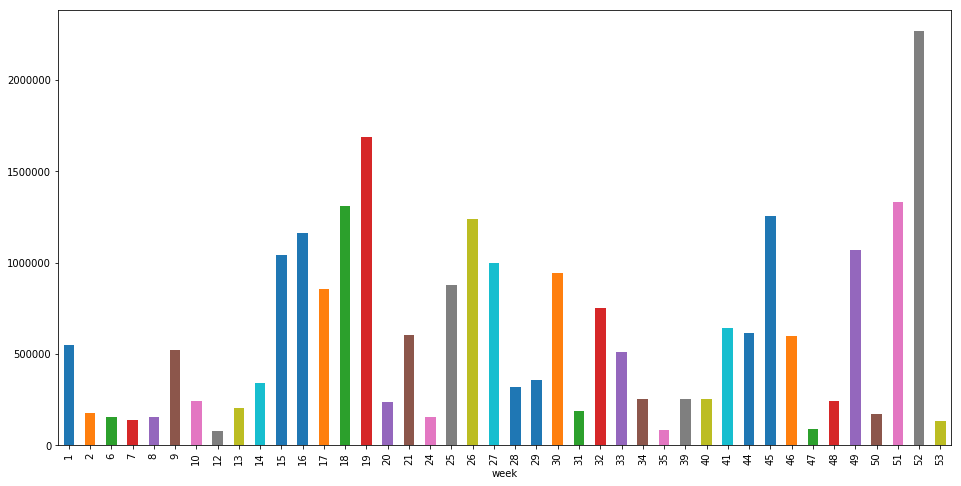

In [175]:
#graphical View
z=weekly_transactions['transactions']
plot(z)

Comment: From above graph we conclude that 52 week has highest and 35 week has the minimun transaction recorded.


# Conclusion

We have successfuly answer the all the Question. Most of the Question's answer was easily derivable from the graphs but for the count and preciseness we need to refer the output of the code.

As far cleaning of Data is concerned We have chose to drop and replace the NaN value as per the requirement.For example in the Q-3 we just need the rows in which holiday rows where mention so there we drop the NaN values while finding the average oil price we required all the rows so we replace the Nan value with mean values. Imputation was not implemented as the dataset was not that big or complex or any training models were used to perform the analysis that would required to write imputer code which in would have it more complex to see.

